# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calls

## Data read

In [2]:
Data_frame_Calls_training = pd.read_csv("Calls\ytr")

In [3]:
Data_frame_Calls_testing = pd.read_csv("Calls\yts")

## Short data description

In [4]:
print(Data_frame_Calls_training.head())

   2.000000000000000000e+00
0                       0.0
1                       0.0
2                       1.0
3                       0.0
4                       0.0


In [5]:
Data_frame_Calls_training.describe()

,2.000000000000000000e+00
count,6199.000000
mean,15.088240
std,14.163583
min,0.000000
25%,1.000000
50%,14.000000
75%,24.000000
max,89.000000


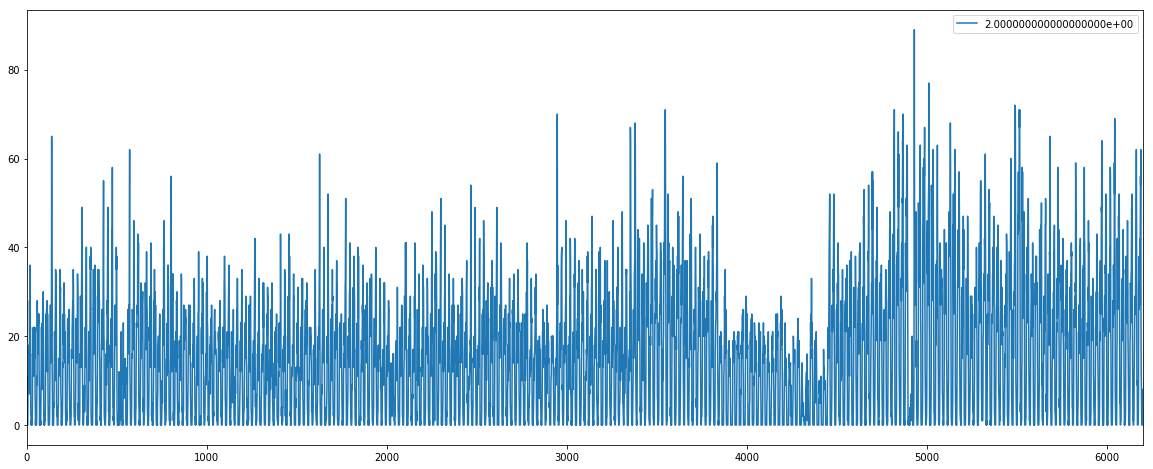

In [6]:
Data_frame_Calls_training.plot(figsize=(20,8))
plt.show()

In [4]:
test = Data_frame_Calls_training.iloc[:200,:]

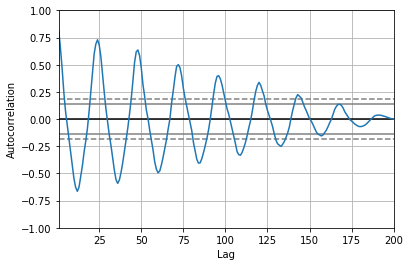

In [5]:
pd.plotting.autocorrelation_plot(test)
plt.show()

## Additional function to measure error

In [53]:
def dMAPE(y, yhat, d = 24):
    Md = list()
    n = len(yhat)
    
    if d%2 == 0:
        temp = np.sum(yhat[:d])/d
        for i in range(int(d/2)):
            Md.append(temp)
        for j in range(len(yhat) - d):
            Md.append(np.sum(yhat[j:j + d])/d)
        temp = np.sum(yhat[-d:])/d
        for k in range(int(d/2)):
            Md.append(temp)
        return np.sum(np.abs((np.array(y) - np.array(yhat)) / np.array(Md))) / n
    temp = np.sum(yhat[:d])/d
    for i in range(int(d/2) + 1):
        Md.append(temp)
    for j in range(len(yhat) - d):
        Md.append(np.sum(yhat[j:j + d])/d)
    temp = np.sum(yhat[-d:])/d
    for k in range(int(d/2)):
        Md.append(temp)
    return np.sum(np.abs((np.array(y) - np.array(yhat)) / np.array(Md))) / n

## ARIMA

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  SARIMAX Results                                   
Dep. Variable:     2.000000000000000000e+00   No. Observations:                  730
Model:                      ARIMA(24, 0, 3)   Log Likelihood               -2356.767
Date:                      Mon, 04 Oct 2021   AIC                           4771.534
Time:                              16:28:27   BIC                           4904.733
Sample:                                   0   HQIC                          4822.923
                                      - 730                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9490      2.476      8.056      0.000      15.095      24.803
ar.L1          0.4868      0.255      1.908      0.056      -0.013       0.987
ar.L

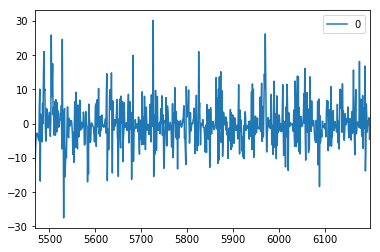

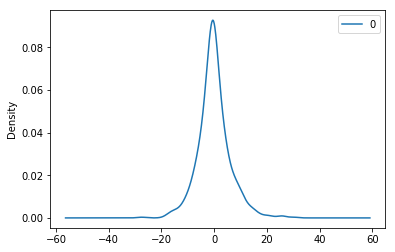

                0
count  730.000000
mean    -0.002499
std      6.126897
min    -27.512111
25%     -3.210777
50%     -0.316629
75%      2.677070
max     30.228337


In [6]:
# fit model
model = ARIMA(Data_frame_Calls_training[-730:], order=(24,0,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [212]:
train = Data_frame_Calls_training.values
test = Data_frame_Calls_testing.values

## One hour predictions for whole test period

Test NRMSE: 0.489


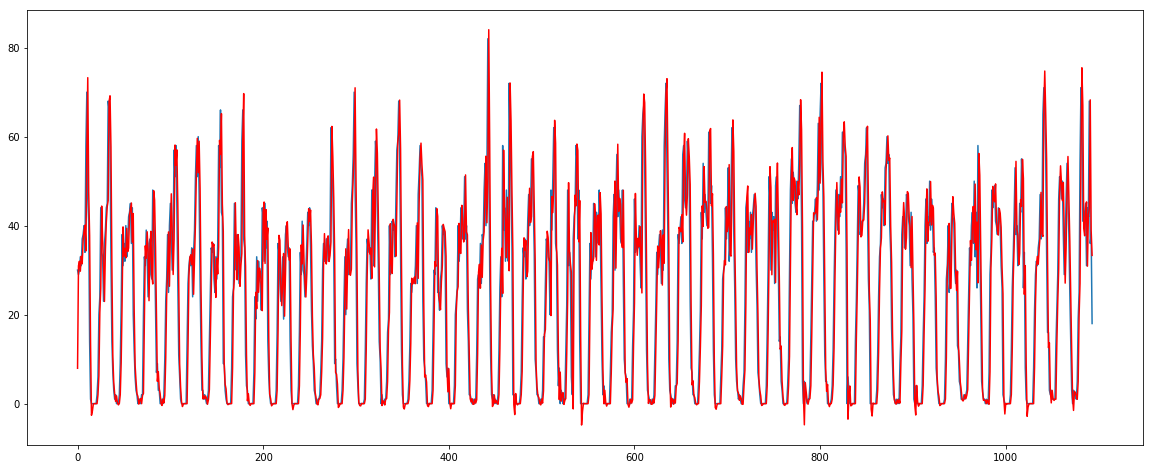

In [11]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## One day predictions vs test data

Test NRMSE: 0.489


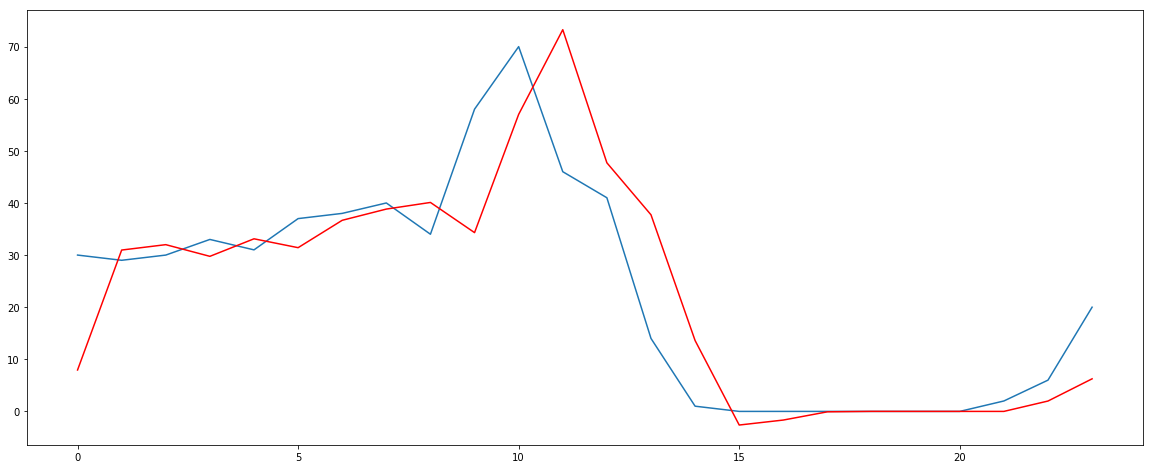

In [12]:
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
lower = 0
upper = 24
plt.figure(figsize = (20,8))
plt.plot(test[lower:upper])
plt.plot(predictions[lower:upper], color='red')
plt.show()

## Longterm predictions with higher complexity of the model

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


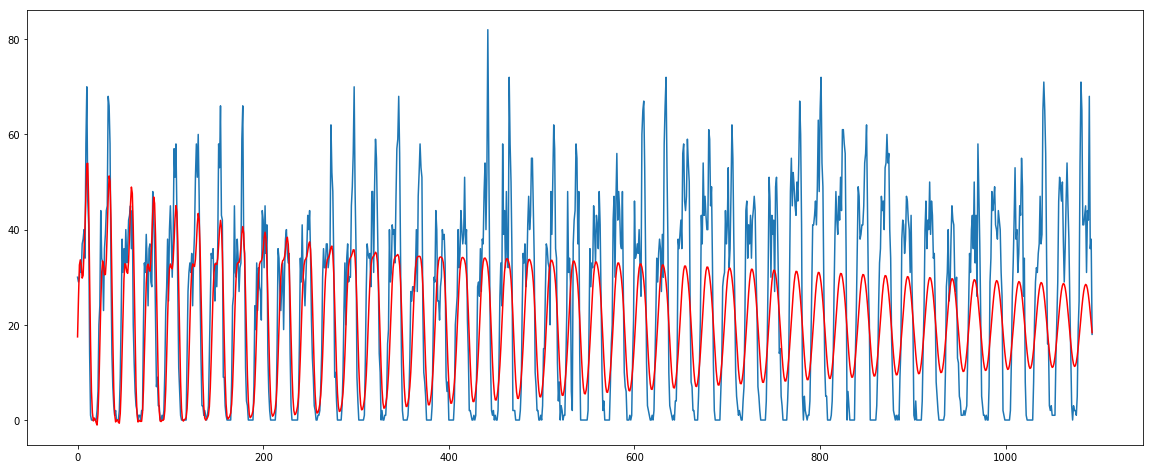

In [227]:
length = len(test)
model = ARIMA(train[-730:], order=(24,0,3)) #(17,0,3)
model_fit = model.fit()
test_pred = model_fit.forecast(length)
plt.figure(figsize = (20,8))
plt.plot(test[:length])
plt.plot(test_pred, color='red')
plt.show()

## Results

## Full period prediction's results

In [228]:
nrmse = sqrt(mean_squared_error(test, test_pred))/np.std(test_pred)
dMAPE_arima_Calls = dMAPE(test, test_pred)
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 1.191
Test dMAPE: 1052.194


## One day prediction's results

In [229]:
nrmse_len = 24
nrmse = sqrt(mean_squared_error(test[:nrmse_len], test_pred[:nrmse_len]))/np.std(test_pred[:nrmse_len])
dMAPE_arima_Calls = dMAPE(test[:nrmse_len], test_pred[:nrmse_len])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 0.434
Test dMAPE: 23.290


## Two day plot

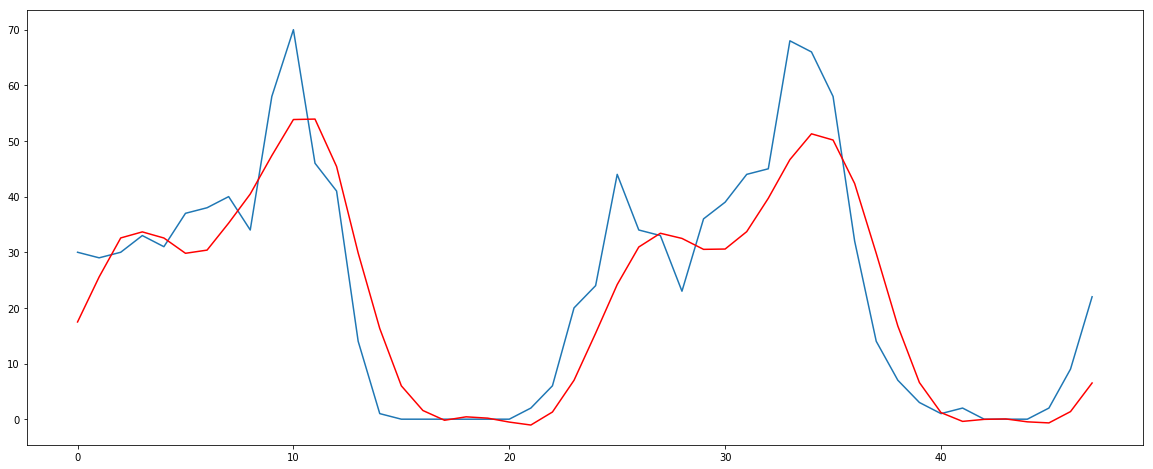

In [230]:
plt.figure(figsize = (20,8))
plt.plot(test[:48])
plt.plot(test_pred[:48], color='red')
plt.show()

## Exponential Smoothing

Test NRMSE: 0.722
Test dMAPE: 1052.194


C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


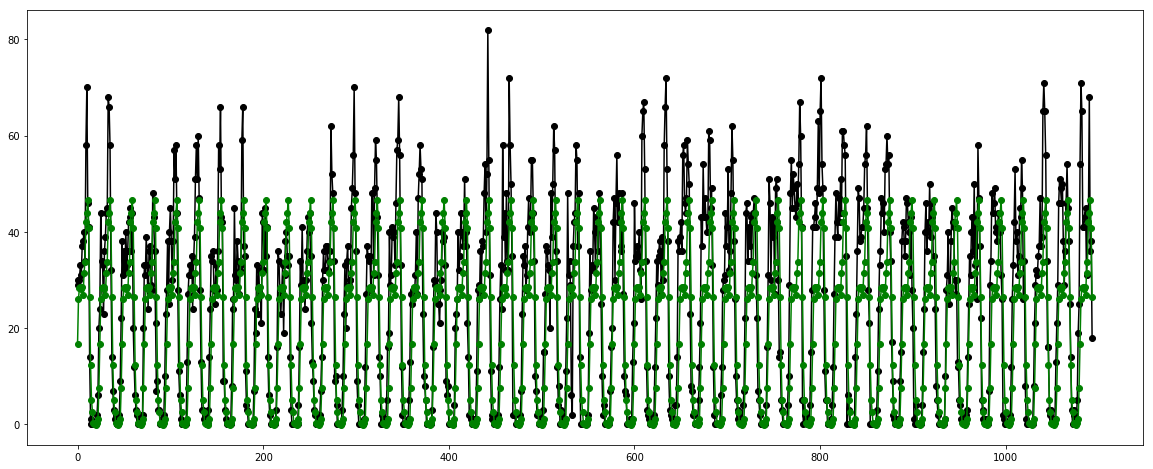

In [248]:
length = len(test)

fit3 = ExponentialSmoothing(train[-730:], seasonal='add', seasonal_periods=24).fit()
fcast3 = fit3.forecast(length)

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plt.figure(figsize=(20, 8))
plt.plot(test[:length], marker='o', color='black')
plt.plot(fcast3, marker='o', color='green')

## Short term results and plot

Test NRMSE: 0.625
Test dMAPE: 48.095


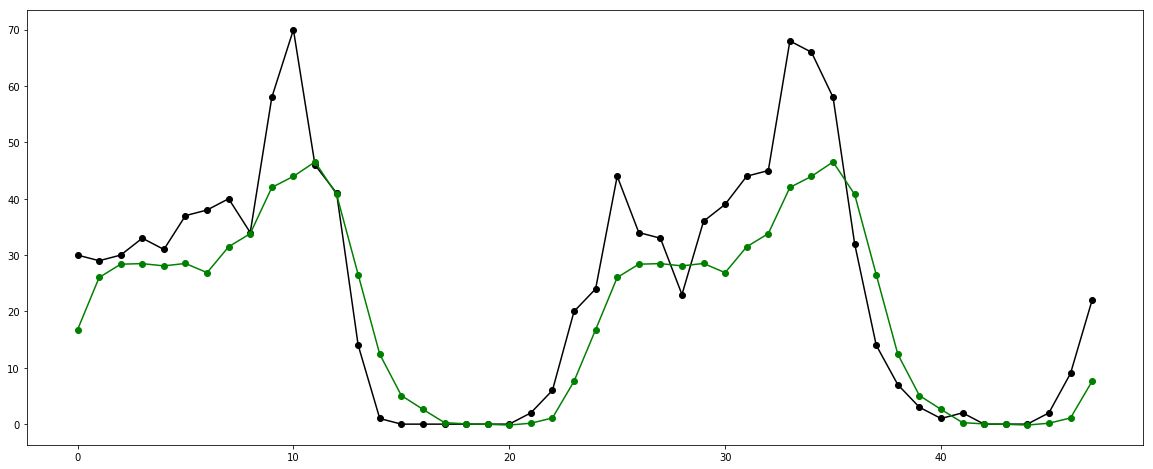

In [249]:
length = 48

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plt.figure(figsize=(20, 8))
plt.plot(test[:length], marker='o', color='black')
plt.plot(fcast3[:length], marker='o', color='green')

# D4D

## Data read

In [7]:
Data_frame_D4D_training = pd.read_csv("D4D\ytr")

In [8]:
Data_frame_D4D_testing = pd.read_csv("D4D\yts")

## Short data description

In [70]:
print(Data_frame_D4D_training.head())

   1.000000000000000000e+00
0                  3.000000
1                  2.028777
2                  1.388489
3                  1.000000
4                 12.000000


In [72]:
Data_frame_D4D_training.describe()

,1.000000000000000000e+00
count,2615.000000
mean,120.696183
std,90.189304
min,1.000000
25%,22.000000
50%,135.000000
75%,186.000000
max,472.000000


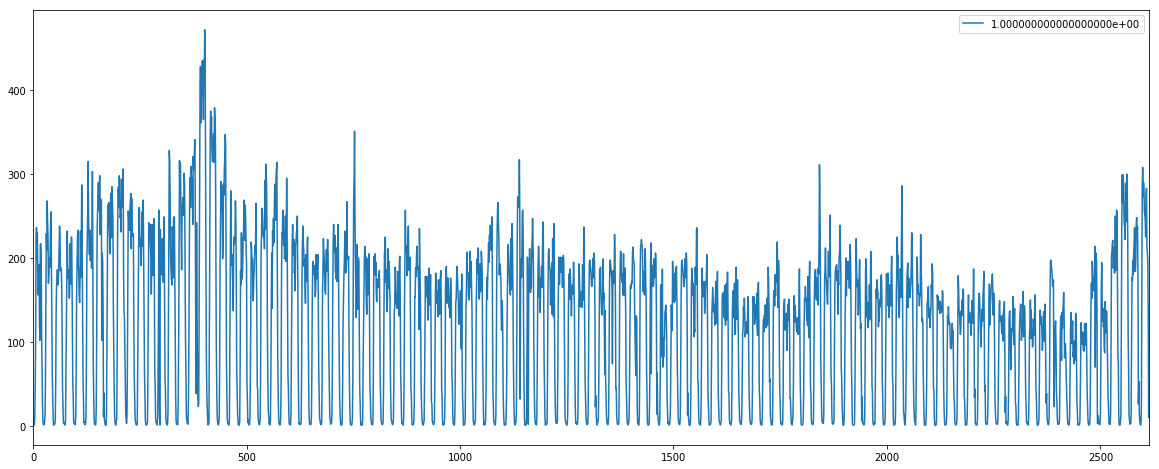

In [73]:
Data_frame_D4D_training.plot(figsize=(20,8))
plt.show()

In [9]:
test = Data_frame_D4D_training.iloc[:200,:]

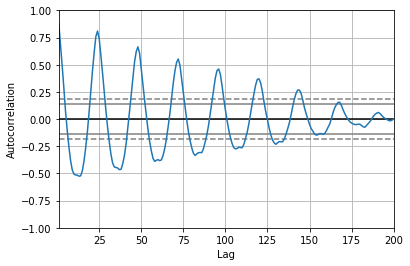

In [10]:
pd.plotting.autocorrelation_plot(test)
plt.show()

## ARIMA

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  SARIMAX Results                                   
Dep. Variable:     1.000000000000000000e+00   No. Observations:                  730
Model:                      ARIMA(22, 0, 3)   Log Likelihood               -3374.246
Date:                      Mon, 04 Oct 2021   AIC                           6802.493
Time:                              16:30:50   BIC                           6926.505
Sample:                                   0   HQIC                          6850.338
                                      - 730                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3240    133.909      0.772      0.440    -159.133     365.781
ar.L1          1.0975      0.087     12.637      0.000       0.927       1.268
ar.L

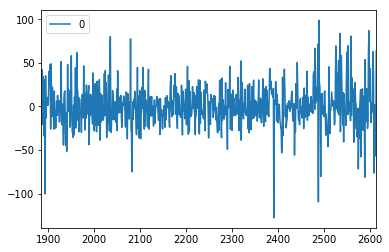

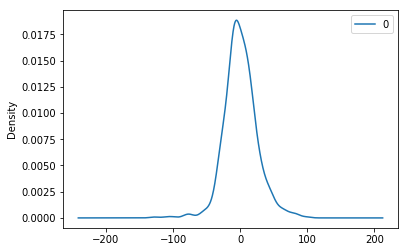

                0
count  730.000000
mean     0.665606
std     24.628689
min   -127.899695
25%    -12.953549
50%     -0.932001
75%     13.952507
max     98.809401


In [12]:
# fit model
model = ARIMA(Data_frame_D4D_training[-730:], order=(22,0,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [250]:
train = Data_frame_D4D_training.values
test = Data_frame_D4D_testing.values

## One hour predictions for whole test period

Test NRMSE: 0.416


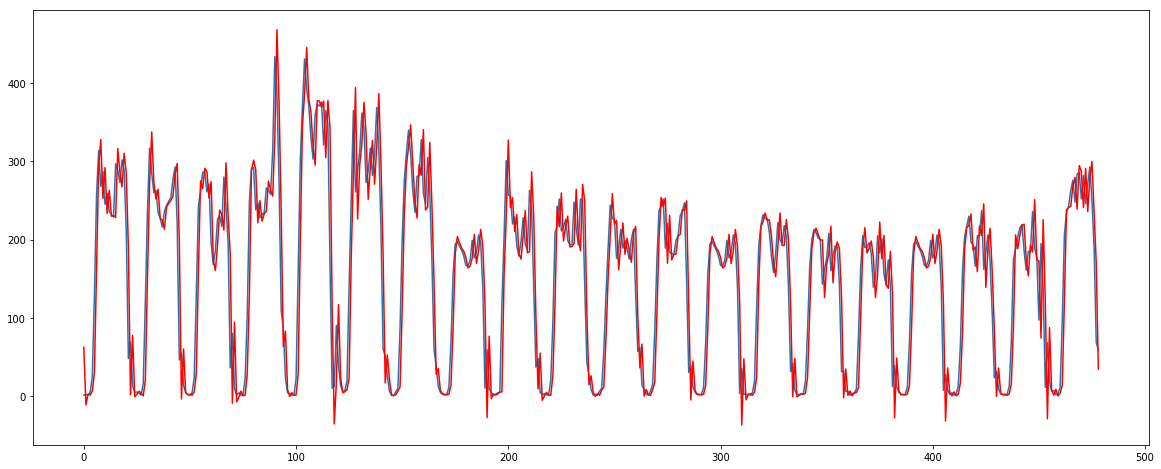

In [78]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## One day predictions vs test data

Test NRMSE: 0.416


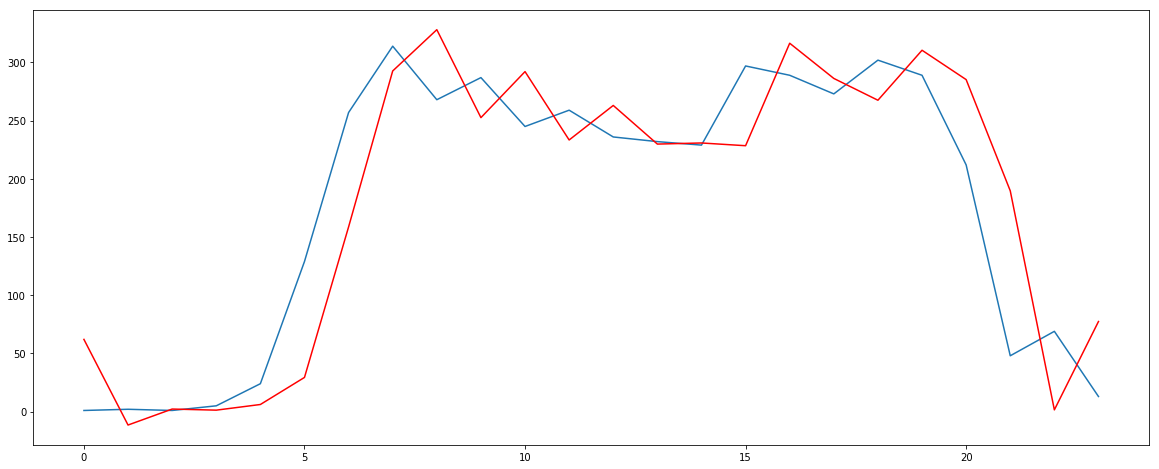

In [79]:
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
lower = 0
upper = 24
plt.figure(figsize = (20,8))
plt.plot(test[lower:upper])
plt.plot(predictions[lower:upper], color='red')
plt.show()

## Longterm predictions with higher complexity of the model

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


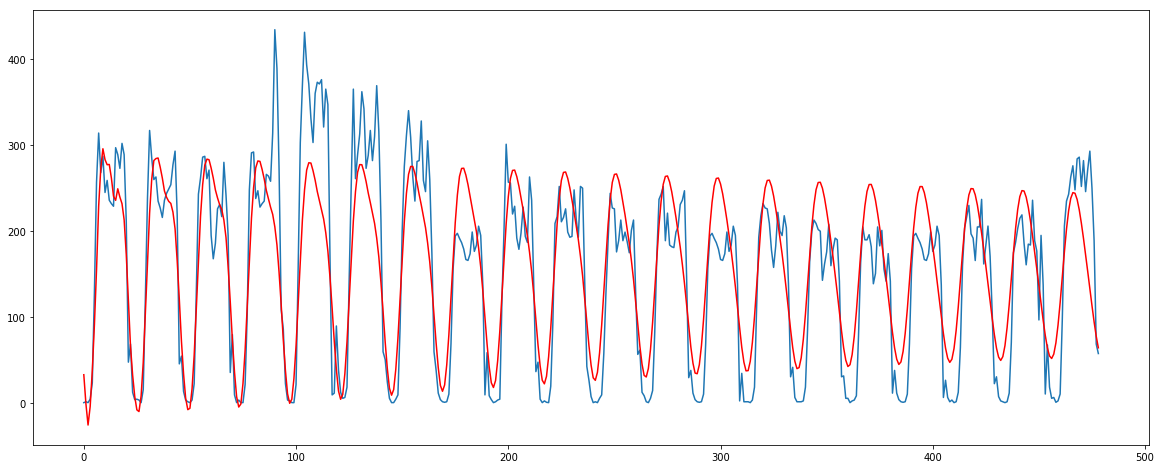

In [208]:
length = len(test)
model = ARIMA(train[-730:], order=(22,0,3)) #(22,0,3)
model_fit = model.fit()
test_pred = model_fit.forecast(length)
plt.figure(figsize = (20,8))
plt.plot(test[:length])
plt.plot(test_pred, color='red')
plt.show()

## Results

## Full period prediction's results

In [209]:
nrmse = sqrt(mean_squared_error(test, test_pred))/np.std(test_pred)
dMAPE_arima_Calls = dMAPE(test, test_pred)
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 0.678
Test dMAPE: 343.648


## One day prediction's results

In [210]:
nrmse_len = 24
nrmse = sqrt(mean_squared_error(test[:nrmse_len], test_pred[:nrmse_len]))/np.std(test_pred[:nrmse_len])
dMAPE_arima_Calls = dMAPE(test[:nrmse_len], test_pred[:nrmse_len])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 0.427
Test dMAPE: 18.109


## Two days plot

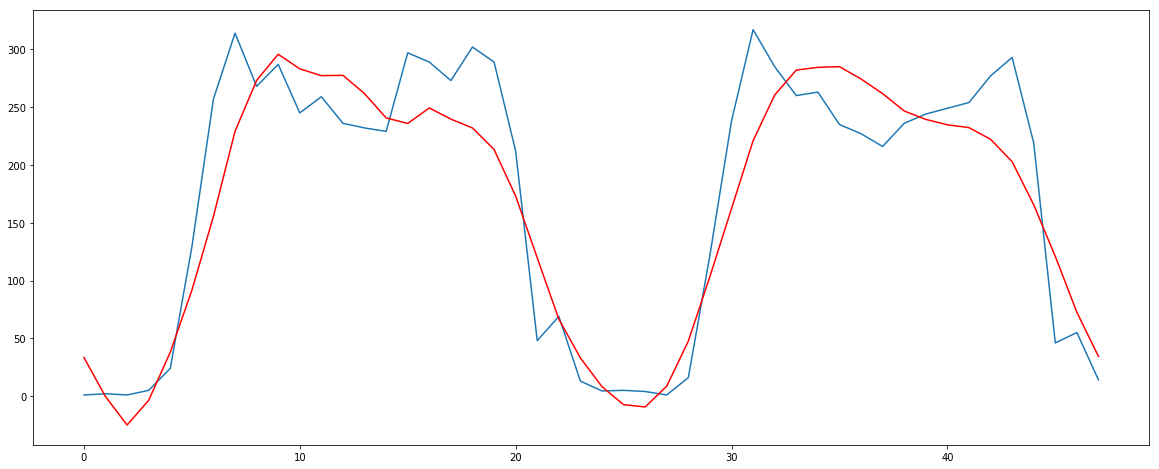

In [211]:
plt.figure(figsize = (20,8))
plt.plot(test[:48])
plt.plot(test_pred[:48], color='red')
plt.show()

## Exponential Smoothing

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Test NRMSE: 1.206
Test dMAPE: 3260.421


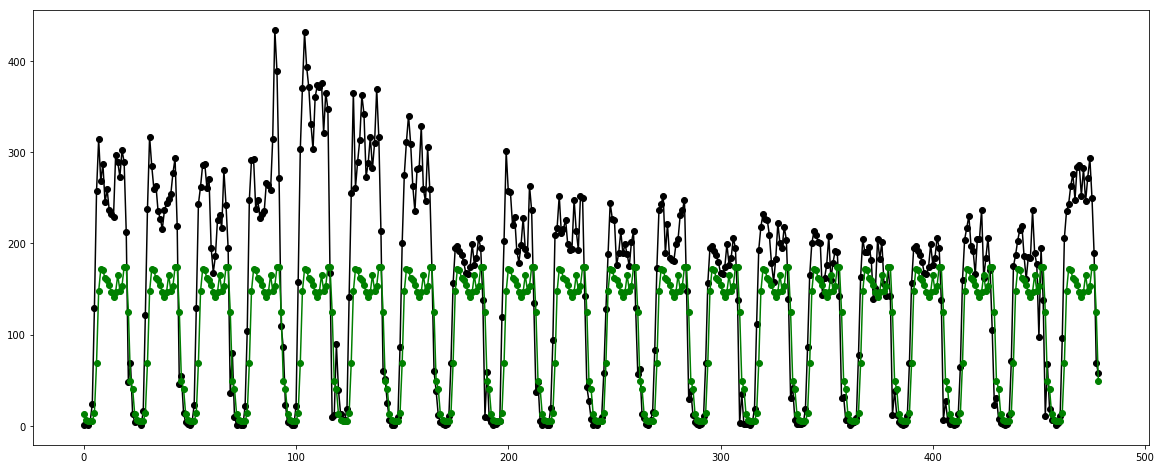

In [251]:
length = len(test)

fit3 = ExponentialSmoothing(train[-730:], seasonal='add', seasonal_periods=24).fit()
fcast3 = fit3.forecast(length)

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plt.figure(figsize=(20, 8))
plt.plot(test[:length], marker='o', color='black')
plt.plot(fcast3, marker='o', color='green')

## Short term results and plot

Test NRMSE: 1.414
Test dMAPE: 349.645


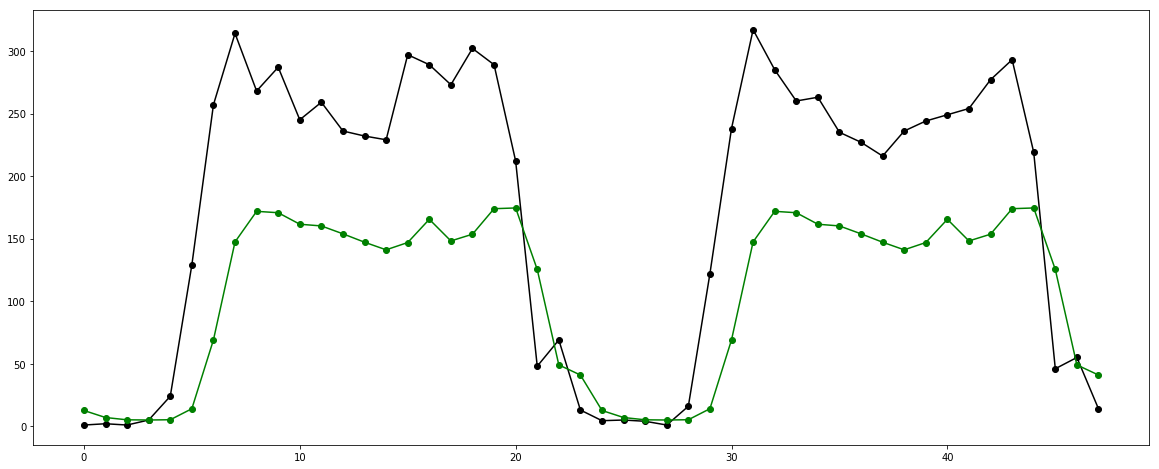

In [252]:
length = 48

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plt.figure(figsize=(20, 8))
plt.plot(test[:length], marker='o', color='black')
plt.plot(fcast3[:length], marker='o', color='green')

# SFrancisco

## Data read

In [13]:
Data_frame_SFrancisco_training = pd.read_csv("SFrancisco\ytr")

In [14]:
Data_frame_SFrancisco_testing = pd.read_csv("SFrancisco\yts")

## Short data description

In [128]:
print(Data_frame_SFrancisco_training.head())

   1.480000000000000000e+02
0                     119.0
1                     104.0
2                     102.0
3                     132.0
4                     110.0


In [129]:
Data_frame_SFrancisco_training.describe()

,1.480000000000000000e+02
count,26277.000000
mean,94.205655
std,40.458649
min,0.000000
25%,60.000000
50%,100.000000
75%,123.000000
max,330.000000


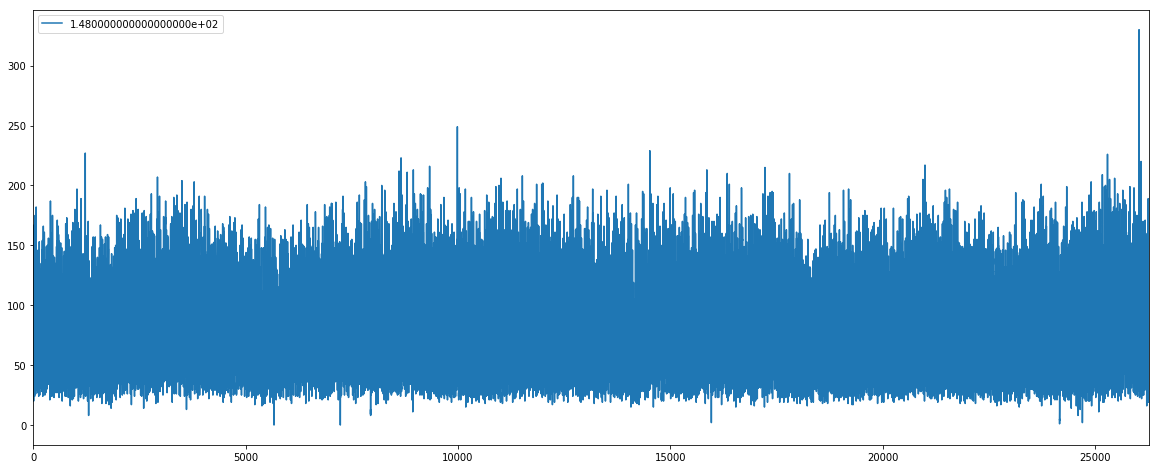

In [130]:
Data_frame_SFrancisco_training.plot(figsize=(20,8))
plt.show()

In [15]:
test = Data_frame_SFrancisco_training.iloc[:200,:]

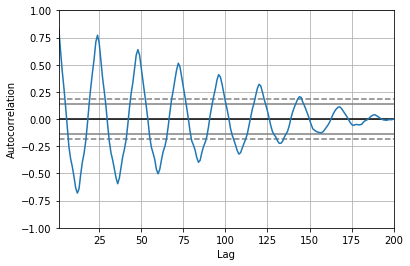

In [16]:
pd.plotting.autocorrelation_plot(test)
plt.show()

## ARIMA

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                  SARIMAX Results                                   
Dep. Variable:     1.480000000000000000e+02   No. Observations:                  730
Model:                      ARIMA(29, 0, 5)   Log Likelihood               -3091.782
Date:                      Mon, 04 Oct 2021   AIC                           6255.563
Time:                              16:39:30   BIC                           6420.913
Sample:                                   0   HQIC                          6319.356
                                      - 730                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2010      1.145     84.928      0.000      94.958      99.444
ar.L1         -0.0372      0.330     -0.113      0.910      -0.685       0.610
ar.L

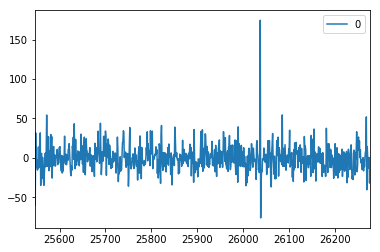

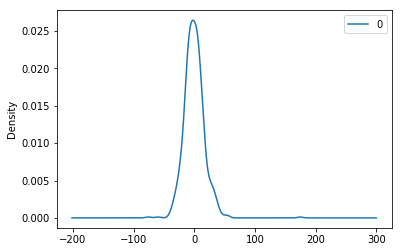

                0
count  730.000000
mean    -0.119194
std     16.813145
min    -76.309832
25%    -10.282895
50%     -0.970749
75%      8.691686
max    174.505213


In [17]:
# fit model
model = ARIMA(Data_frame_SFrancisco_training[-730:], order=(29,0,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [253]:
train = Data_frame_SFrancisco_training.values
test = Data_frame_SFrancisco_testing.values

## One hour predictions for whole test period

Test NRMSE: 0.546


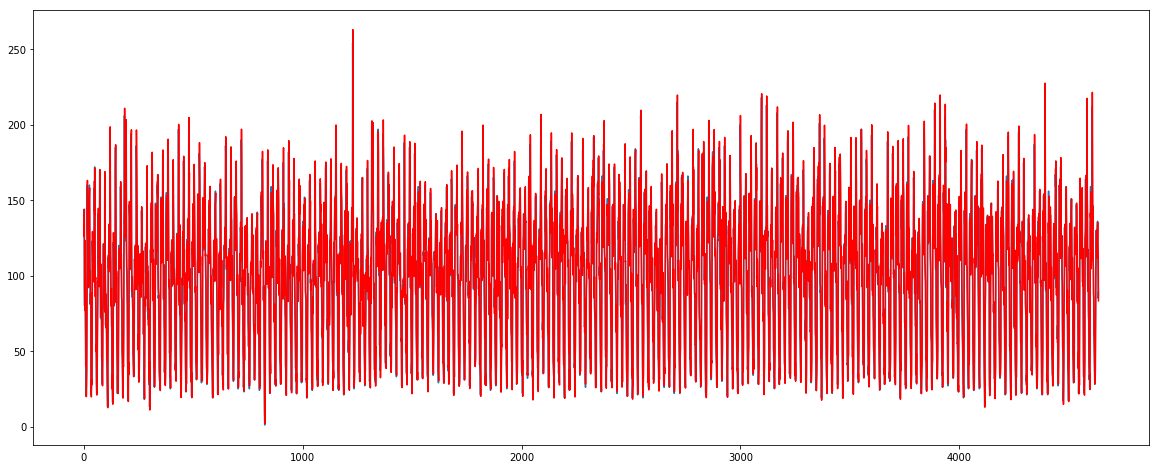

In [135]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.figure(figsize = (20,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## One day predictions vs test data

Test NRMSE: 0.546


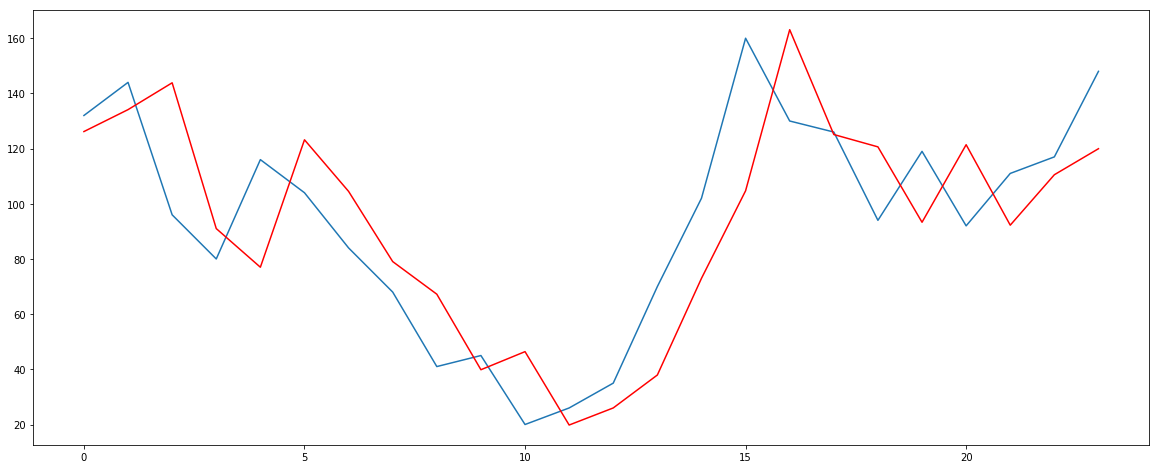

In [136]:
# evaluate forecasts
nrmse = sqrt(mean_squared_error(test, predictions))/np.std(predictions)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
lower = 0
upper = 24
plt.figure(figsize = (20,8))
plt.plot(test[lower:upper])
plt.plot(predictions[lower:upper], color='red')
plt.show()

## Longterm predictions with higher complexity of the model

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


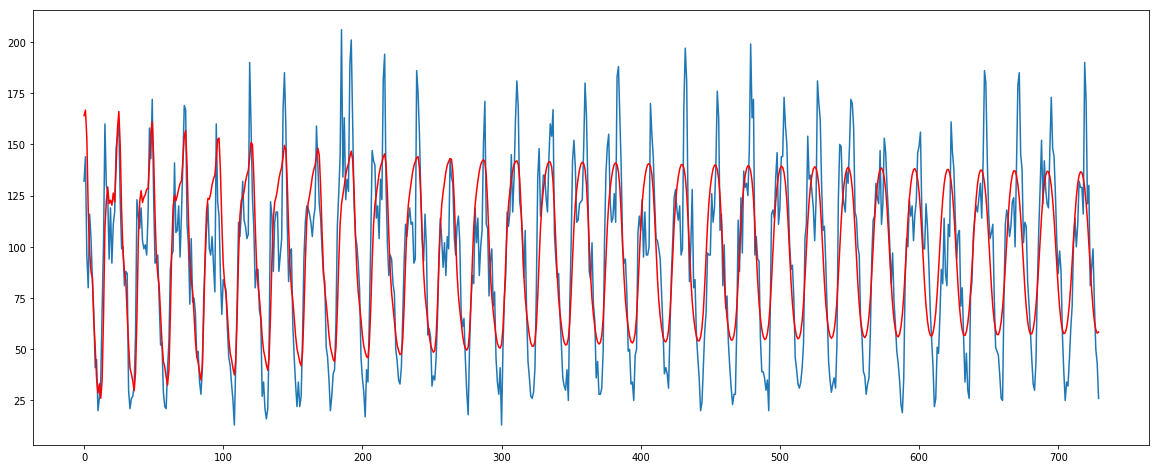

In [193]:
length = 730
model = ARIMA(train[-730:], order=(29,0,5)) #(29,0,3)
model_fit = model.fit()
test_pred = model_fit.forecast(length)
plt.figure(figsize = (20,8))
plt.plot(test[:length])
plt.plot(test_pred, color='red')
plt.show()

## Results

## Full period prediction's results

In [194]:
nrmse = sqrt(mean_squared_error(test[:length], test_pred))/np.std(test_pred)
dMAPE_arima_Calls = dMAPE(test[:length], test_pred)
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 0.687
Test dMAPE: 336.439


## One day prediction's results

In [195]:
nrmse_len = 24
nrmse = sqrt(mean_squared_error(test[:nrmse_len], test_pred[:nrmse_len]))/np.std(test_pred[:nrmse_len])
dMAPE_arima_Calls = dMAPE(test[:nrmse_len], test_pred[:nrmse_len])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_arima_Calls)

Test NRMSE: 0.560
Test dMAPE: 11.705


## Two days plot

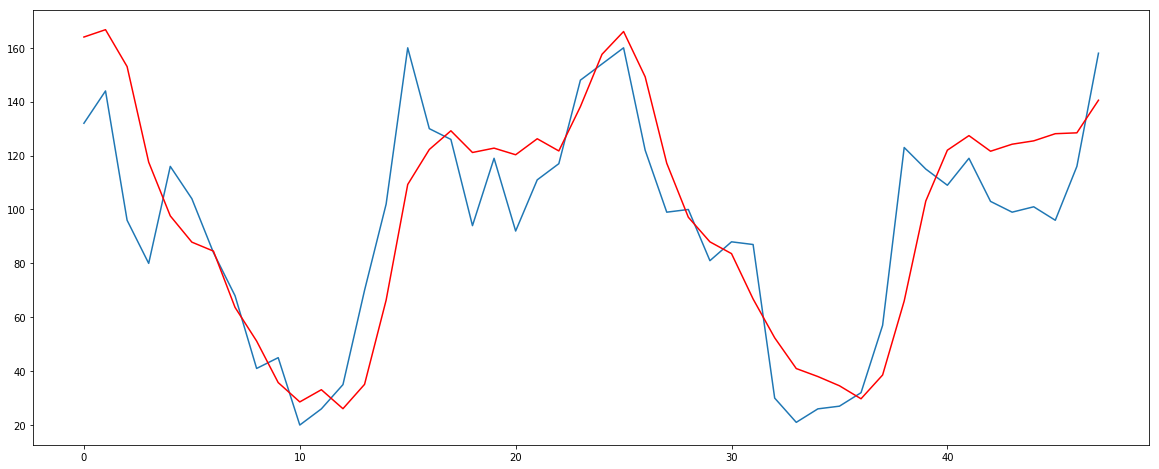

In [196]:
plt.figure(figsize = (20,8))
plt.plot(test[:48])
plt.plot(test_pred[:48], color='red')
plt.show()

## Exponential Smoothing

C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Illia\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Test NRMSE: 0.575
Test dMAPE: 18146.838


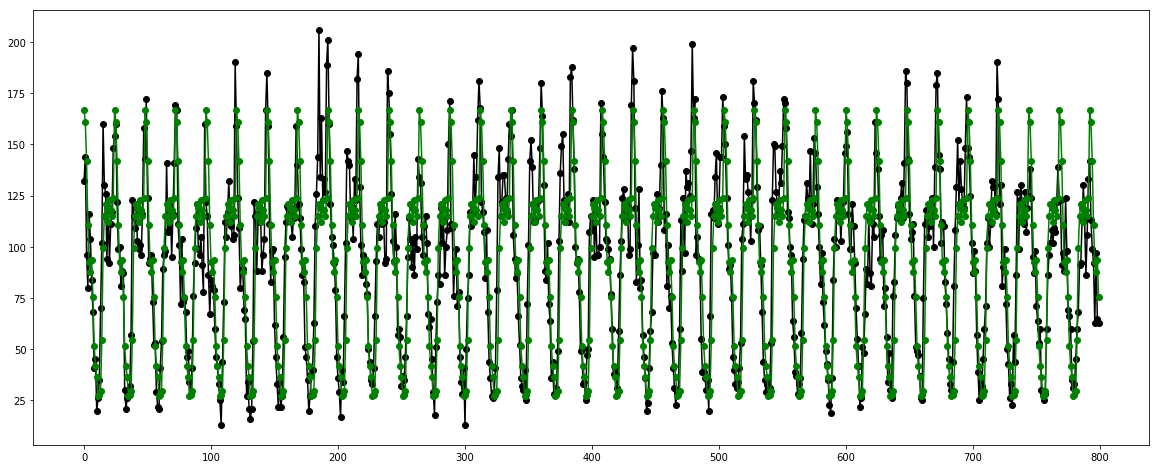

In [257]:
length = len(test)

fit3 = ExponentialSmoothing(train[-730:], seasonal='add', seasonal_periods=24).fit()
fcast3 = fit3.forecast(length)

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plot_len = 800

plt.figure(figsize=(20, 8))
plt.plot(test[:plot_len], marker='o', color='black')
plt.plot(fcast3[:plot_len], marker='o', color='green')

## Short term results and plot

Test NRMSE: 0.572
Test dMAPE: 159.552


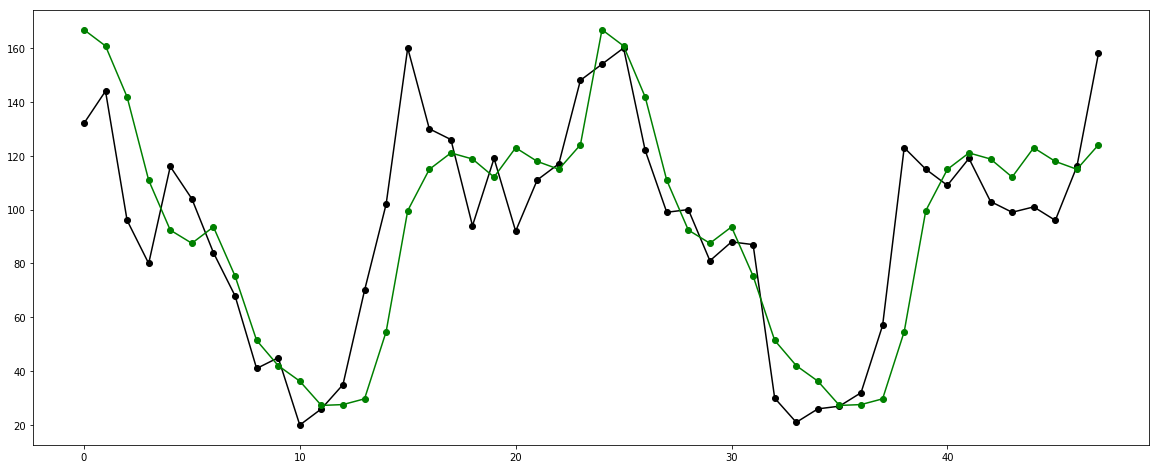

In [255]:
length = 48

nrmse = sqrt(mean_squared_error(test[:length], fcast3[:length]))/np.std(fcast3[:length])
dMAPE_smoothing_Calls = dMAPE(test[:length], test_pred[:length])
print('Test NRMSE: %.3f' % nrmse)
print('Test dMAPE: %.3f' % dMAPE_smoothing_Calls)

plt.figure(figsize=(20, 8))
plt.plot(test[:length], marker='o', color='black')
plt.plot(fcast3[:length], marker='o', color='green')